# Goodbooks EDA

((In progress!))

EDA of the [Goodbooks](https://github.com/zygmuntz/goodbooks-10k) dataset, which includes 10,000 books and 6 million user ratings from Goodreads. 

Future plans:
- More visualizations
- Exploring the other included datasets
- Modeling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

# Set pandas float precision to 2, for readability
pd.set_option('display.precision', 2)

In [2]:
books_df = pd.read_csv('goodbooks-10k-master/books.csv')

In [3]:
books_df.shape

(10000, 23)

In [4]:
books_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.78e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.78e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.78e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.78e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.78e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [42]:
# Pretty-print the column names
for column in books_df.columns:
    print(column)

book_id
goodreads_book_id
best_book_id
work_id
books_count
isbn
isbn13
authors
original_publication_year
original_title
title
language_code
average_rating
ratings_count
work_ratings_count
work_text_reviews_count
ratings_1
ratings_2
ratings_3
ratings_4
ratings_5
image_url
small_image_url


Some of these columns may seem redundant or odd. In particular, why does every book have several different IDs? Each ID serves a different purpose; according to the README from the git repo: 

*"Each book may have many editions. goodreads_book_id and best_book_id generally point to the most popular edition of a given book, while goodreads work_id refers to the book in the abstract sense."*

# Average Rating

In [6]:
books_df['average_rating'][:10]

0    4.34
1    4.44
2    3.57
3    4.25
4    3.89
5    4.26
6    4.25
7    3.79
8    3.85
9    4.24
Name: average_rating, dtype: float64

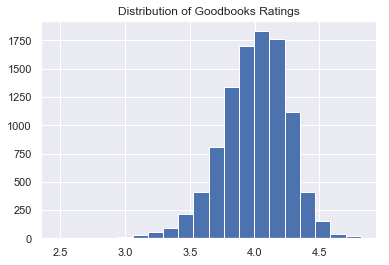

In [7]:
sns.set()
books_df.average_rating.hist(bins = 20)
plt.title('Distribution of Goodbooks Ratings')
plt.show()

It's interesting to see that this distribution resembles a normal distribution, centered around a rather high rating (4 out of 5). 

Having spent a decent amount of time looking at various book ratings on the actual Goodreads site, I have a few potential explanations for this: 
1. These books are a nonrandom sampling of the books on Goodreads, possibly the most "popular" 10,000 books on Goodreads. 
2. Goodreads users don't use the 1-5 rating system as it is meant to be used. According to Goodreads, a 3-star rating is sufficient to express that a user "liked" the book. (See below.) However, there are few ratings in this dataset that fell below a 3.5. And the most frequent average rating, roughly a 4, means "*really* liked it."
3. Users don't feel comfortable rating a book they didn't finish, so there is selection bias in rated books. Books that were rated were mostly books that readers decided to finish, which generally means the reader thought the book was worth their time.

This could be explored further by looking into the within-user distribution of ratings.

![Goodreads Rating System](https://i.imgur.com/7bZN4lr.png)

In [8]:
books_df.average_rating.describe()

count    10000.00
mean         4.00
std          0.25
min          2.47
25%          3.85
50%          4.02
75%          4.18
max          4.82
Name: average_rating, dtype: float64

# Popular Tags

In [9]:
# Read in tags.csv and book_tags.csv
book_tags_df_tmp = pd.read_csv('goodbooks-10k-master/book_tags.csv')
tags_df = pd.read_csv('goodbooks-10k-master/tags.csv')

In [10]:
tags_df.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [11]:
tags_df.tail()

,tag_id,tag_name
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


Some of the tag names look a little eccentric, presumably because any user can create a tag, but the most popular tags will float to the top when we sort by count.

In [12]:
book_tags_df_tmp.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [13]:
book_tags_df = pd.merge(book_tags_df_tmp, tags_df, on = 'tag_id')

In [14]:
book_tags_df.sort_values(by='count', ascending = False)[:10]

,goodreads_book_id,tag_id,count,tag_name
84,865,30574,596234,to-read
6140,2429135,30574,586235,to-read
9108,18143977,30574,505884,to-read
2,3,30574,496107,to-read
1671,24280,30574,488469,to-read
7846,11235712,30574,474954,to-read
4110,168668,30574,465640,to-read
1438,18405,30574,454565,to-read
383,4981,30574,443942,to-read
91,930,30574,436097,to-read


The top 10 tags by count are all "to-read," which is not surprising. In order to tag a book as "to-read," Goodreads users only need to click a button which puts the book on their "to-read" shelf. 

In [15]:
tag_id_to_name = zip(book_tags_df['tag_id'], book_tags_df['tag_name'])
tag_id_to_name = dict(tag_id_to_name)

In [16]:
for k in list(tag_id_to_name)[:25]:
    print(k, ":", tag_id_to_name[k])

30574 : to-read
11305 : fantasy
11557 : favorites
8717 : currently-reading
33114 : young-adult
11743 : fiction
14017 : harry-potter
5207 : books-i-own
22743 : owned
32989 : ya
27199 : series
11590 : favourites
18886 : magic
6953 : childrens
22753 : owned-books
24960 : re-read
1691 : adventure
6857 : children
15965 : j-k-rowling
6888 : children-s
26785 : sci-fi-fantasy
6828 : childhood
2104 : all-time-favorites
9221 : default
20774 : my-books


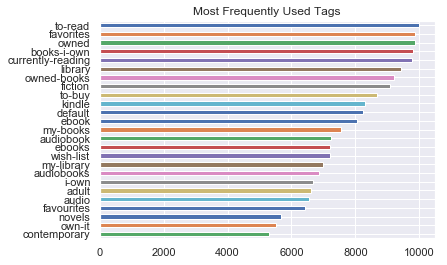

In [41]:
book_tags_df['tag_name'].value_counts()[:25].plot.barh(title = "Most Frequently Used Tags").invert_yaxis()
# TODO: figure out how to plot this in Seaborn

Upon eyeballing this graph, it looks like there are a few common themes in the most frequently-used tags:
- "to-read", "to-buy", "wish-list" express the intention of purchasing and reading the book
- "i-own", "owned", "books-i-own", "owned-books", "own-it", "library", etc. all refer to already owning the book
- "favorites", "favourites" are among a user's most-loved books

These could all be useful from a business standpoint. For example, let's say the user's Goodreads account is linked up with her Amazon account. Amazon could include a feature whereby it pulls in data from the user's "to-read," "to-buy", "wish-list" tags and creates an Amazon wishlist including these books. The wishlist could even be dynamically updated anytime she adds a new book, and Amazon can use the data to retarget her with these books all over Amazon and the rest of the web. 

"i-own" and similar tags could all be used to downweight recommendations of these books on the Amazon website and elsewhere, since presumably a user is not interested in buying a book she already owns, unless as a gift.

"favorites" could be given special weight in recommending new books to the user, since she presumably most enjoys books with characteristics similar to this one. In this case, it may be useful to see if a book being tagged under "favorites" is correlated with higher ratings from the user. 

In [ ]:
# To be continued!